In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
df = pd.read_csv('Wholesale customers data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


- 1) FRESH: annual spending (m.u.) on fresh products (Continuous);
- 2) MILK: annual spending (m.u.) on milk products (Continuous);
- 3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
- 4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
- 5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
- 6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
- 7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
- 8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal) 

In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Descriptive Analysis

In [19]:
df['Channel'] = df['Channel'].astype('category')

In [20]:
df['Region'] = df['Region'].astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null category
Region              440 non-null category
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: category(2), int64(6)
memory usage: 21.8 KB


In [22]:
#Checking the frequencies of the Channel and Region variables

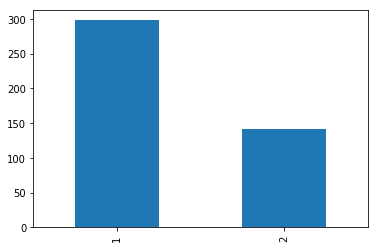

In [36]:
df['Channel'].value_counts().plot(kind='bar')

The majority of the customers belongs to the Horeca channel (hotel, restaurant or cafe)

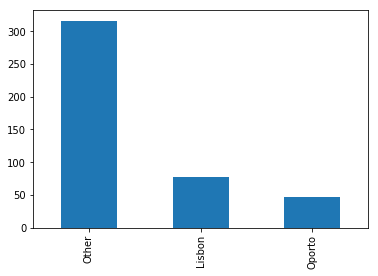

In [40]:
df['Region'].map({1:'Lisbon', 2:'Oporto', 3:'Other'}).value_counts().plot(kind='bar')

Customers didn't buy only in the big cities, but the majority comes from outside Lisbon or Oporto.

### Continuous Variables 

In [45]:
import seaborn as sn

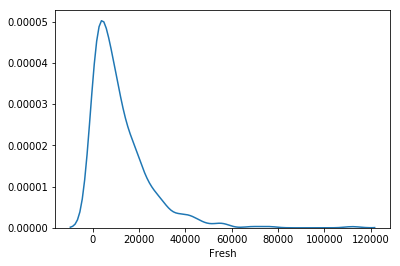

In [47]:
sn.distplot(df['Fresh'], hist=False)

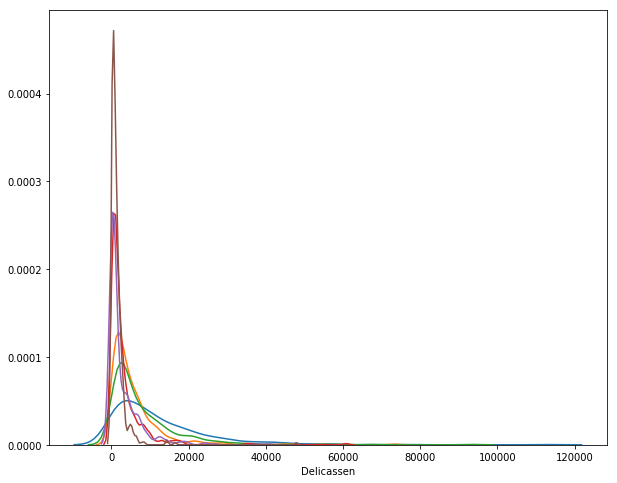

In [78]:
plt.figure(figsize=(10,8))
for col in df.columns:
    if df[col].dtype =='int64':
        sn.distplot(df[col], hist=False)

All distributions seem to be skewed, let's try plotting the log of the variables instead

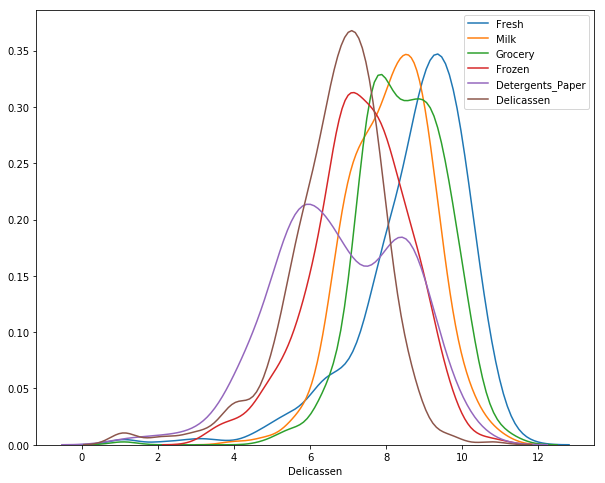

In [83]:
plt.figure(figsize=(10,8))
for col in df.columns:
    if df[col].dtype =='int64':
        sn.distplot(np.log(df[col]), hist=False, label=col)

In [84]:
# Something that came immediately to mind: do customers who buy more fresh products use less frozen ones? 

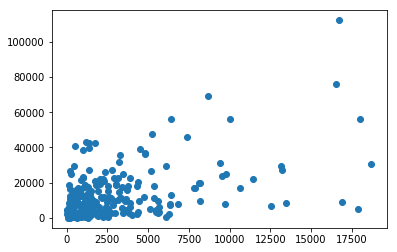

In [88]:
sample_df = df.sample(250)
plt.scatter(sample_df['Frozen'], sample_df['Fresh'])

Apparently, there is no correlation. So, I'll try pairplots to have an immediate look at possible relationships 

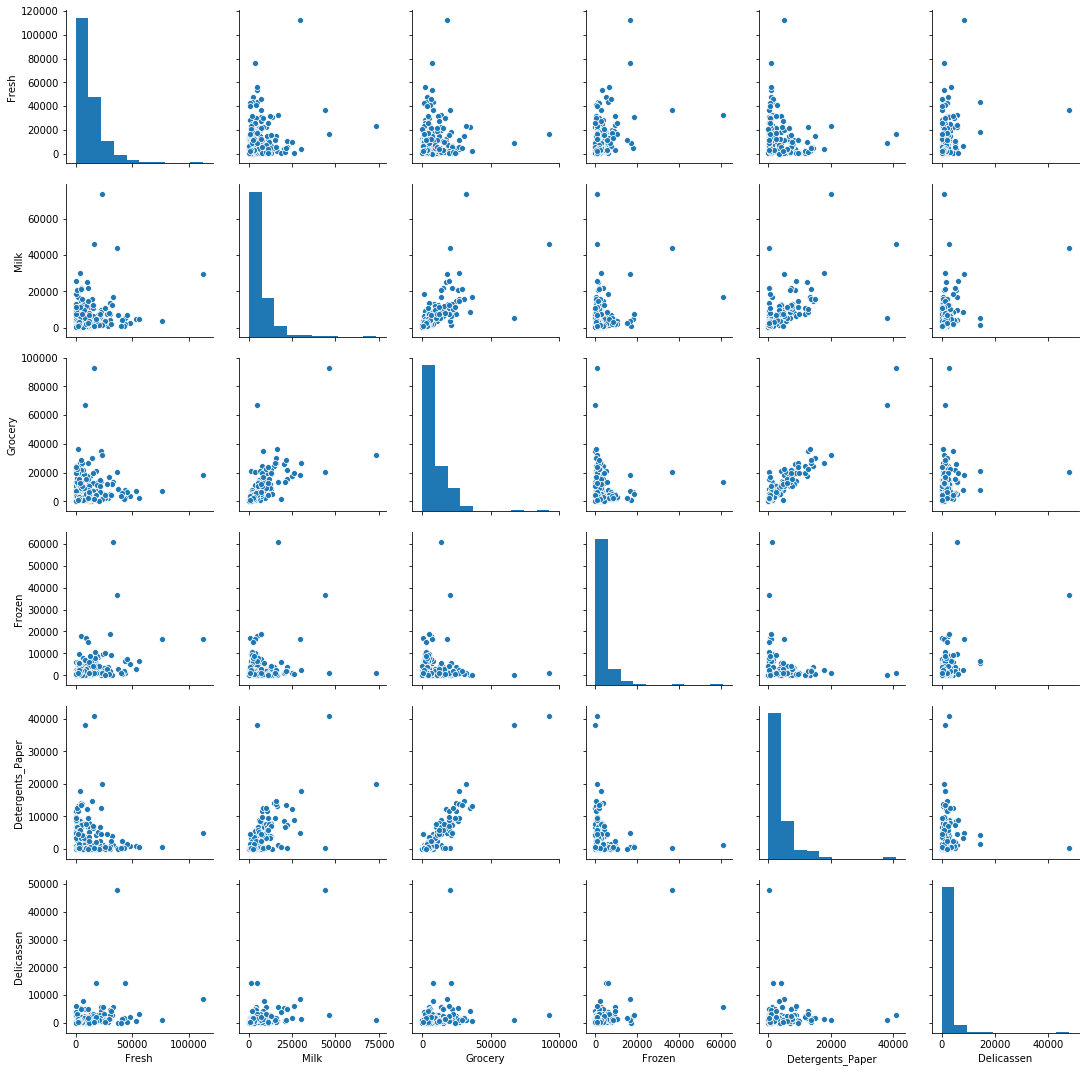

In [92]:
sn.pairplot(df.sample(200).select_dtypes('number'))

There is some sort of correlation between Grocery and Detergents_Paper and Milk; the other variables seem not related

## 2D space for visualization

In [93]:
from sklearn.decomposition import PCA 


In [94]:
pca = PCA(n_components = 2)

In [100]:
pca_x = pca.fit_transform(df.select_dtypes('number'))

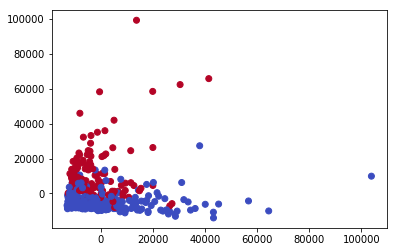

In [105]:
plt.scatter(pca_x[:,0], pca_x[:,1] , c = df['Channel'], cmap='coolwarm')

The interesting fact is that the data seems separable with respect to the Channel; 

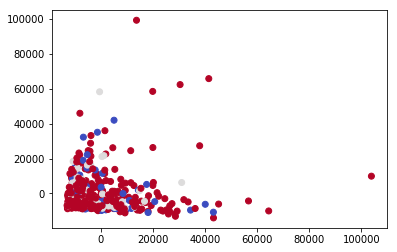

In [114]:
plt.scatter(pca_x[:,0], pca_x[:,1] , c = df['Region'], cmap='coolwarm')

The PCA clearly does not separate points w.r.t. Region

In [115]:
from sklearn.manifold import TSNE

In [116]:
tsne = TSNE(n_components = 2)

In [117]:
tsne_x = tsne.fit_transform(df.select_dtypes('number'))

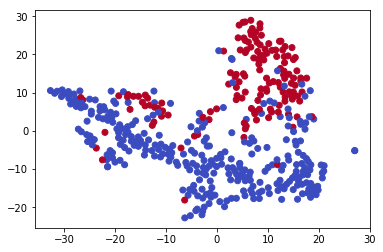

In [120]:
plt.scatter(tsne_x[:,0], tsne_x[:,1] , c = df['Channel'], cmap='coolwarm')